# Jaringan berlapis tunggal

<p align=”justify”>Jaringan berlapis tunggal (<i>single-layer neural network</i>) merupakan arsitektur ANN sederhana yang hanya mempunyai sebuah lapisan tersembunyi (<i>hidden layer</i>). Pada bagian ini kita akan menggunakan jaringan berlapis tunggal sebagai sistem pengklasifikasi sederhana. Untuk mengawalinya seperti biasa, kita harus lakukan pengimporan beberapa pustaka terlebih dahulu:</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl
plt.xkcd() # biar lucu
plt.style.use('ggplot') # karena saya pengguna R juga biar bagus, Bro plotnya!
%matplotlib inline

Kemudian kita akan menggunakan fungsi <a href="https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html"><code>loadtxt</code></a> untuk membuka file yang telah saya sediakan:

In [2]:
data = np.loadtxt('../data/data_nn_sederhana.txt')
data 

array([[1. , 4. , 0. , 0. ],
       [1.1, 3.9, 0. , 0. ],
       [1.2, 4.1, 0. , 0. ],
       [0.9, 3.7, 0. , 0. ],
       [7. , 4. , 0. , 1. ],
       [7.2, 4.1, 0. , 1. ],
       [6.9, 3.9, 0. , 1. ],
       [7.1, 4.2, 0. , 1. ],
       [4. , 1. , 1. , 0. ],
       [4.1, 0.9, 1. , 0. ],
       [4.2, 1.1, 1. , 0. ],
       [3.9, 0.8, 1. , 0. ],
       [4. , 7. , 1. , 1. ],
       [4.2, 7.2, 1. , 1. ],
       [3.9, 7.1, 1. , 1. ],
       [4.1, 6.8, 1. , 1. ]])

Kemudian kita melakukan pemisahan fitur (dua kolom pertama) dan label (dua kolom terakhir):

In [3]:
fitur = data[:, :2]
fitur

array([[1. , 4. ],
       [1.1, 3.9],
       [1.2, 4.1],
       [0.9, 3.7],
       [7. , 4. ],
       [7.2, 4.1],
       [6.9, 3.9],
       [7.1, 4.2],
       [4. , 1. ],
       [4.1, 0.9],
       [4.2, 1.1],
       [3.9, 0.8],
       [4. , 7. ],
       [4.2, 7.2],
       [3.9, 7.1],
       [4.1, 6.8]])

In [4]:
label = data[:,2:]
label

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

Supaya terbayang, mari kita visualisasikan dulu fitur - fitur pada data ini:

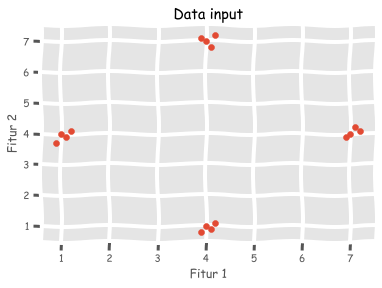

In [5]:
plt.scatter(fitur[:,0], fitur[:,1]);
plt.xlabel('Fitur 1');
plt.ylabel('Fitur 2');
plt.title('Data input');

Seperti biasa kita akan melakukan pra-pemrosesan data sebelum dijadikan *input*-an model:

In [6]:
fit1_min, fit1_maks = fitur[:,0].min(), fitur[:,0].max()
fit2_min, fit2_maks = fitur[:,1].min(), fitur[:,1].max()
fit1 = [fit1_min, fit1_maks]
fit2 = [fit2_min, fit2_maks]

output = label.shape[1]

Masukkan ke dalam model ANN:

In [7]:
snn = nl.net.newp([fit1,fit2], output)

Lakukan *training* untuk mencapai *learning rate* 0,01 dan kemudian kita visualisasikan hasilnya:

Epoch: 20; Error: 4.0;
Epoch: 40; Error: 4.0;
Epoch: 60; Error: 4.0;
Epoch: 80; Error: 4.0;
Epoch: 100; Error: 4.0;
The maximum number of train epochs is reached


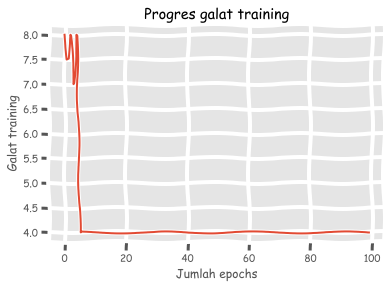

In [8]:
progres_galat = snn.train(fitur, label, epochs=100, show=20, lr=.01)

# visualisasi
plt.plot(progres_galat);
plt.xlabel('Jumlah epochs');
plt.ylabel('Galat training');
plt.title('Progres galat training');

Ternyata kita *kebanyakan* di dalam mengatur jumlah *epochs*-nya, tapi ya sudah *lah ya*...

Sekarang saatnya kita melakukan prediksi dengan menggunakan tiga pasang nilai:

In [9]:
print('Prediksi:\n')
tes = [[0.3, 4.2], [4.3, 0.5], [4.6, 8]]
for i in tes:
    print(i, '==>', snn.sim([i])[0])

Prediksi:

[0.3, 4.2] ==> [0. 0.]
[4.3, 0.5] ==> [1. 0.]
[4.6, 8] ==> [1. 1.]
